In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import os
print(os.listdir('./input/'))

['EDA(1)_test1_activity.csv', 'EDA(1)_test1_combat.csv', 'EDA(1)_test1_payment.csv', 'EDA(1)_test1_pledge.csv', 'EDA(1)_test1_source_trade.csv', 'EDA(1)_test1_target_trade.csv', 'EDA(1)_test2_activity.csv', 'EDA(1)_test2_combat.csv', 'EDA(1)_test2_payment.csv', 'EDA(1)_test2_pledge.csv', 'EDA(1)_train_activity.csv', 'EDA(1)_train_combat.csv', 'EDA(1)_train_payment.csv', 'EDA(1)_train_pledge.csv', 'EDA(1)_train_source_trade.csv', 'EDA(1)_train_target_trade.csv', 'EDA(2)_test1_combat.csv', 'EDA(2)_test2_combat.csv', 'EDA(2)_train_combat.csv', 'sort_train_label.csv']


관계성을 찾기 위해서 label파일과 merge가 필요하므로 train 파일만 열 예정

In [4]:
tr_act = pd.read_csv('./input/EDA(1)_train_activity.csv')
tr_combat = pd.read_csv('./input/EDA(1)_train_combat.csv')
tr_payment = pd.read_csv('./input/EDA(1)_train_payment.csv')
tr_pledge = pd.read_csv('./input/EDA(1)_train_pledge.csv')
tr_source_trade = pd.read_csv('./input/EDA(1)_train_source_trade.csv')
tr_target_trade = pd.read_csv('./input/EDA(1)_train_target_trade.csv')
tr_label = pd.read_csv('./input/sort_train_label.csv')

In [5]:
print(tr_act.shape)
tr_act.head()

(40000, 14)


,acc_id,playtime,npc_kill,solo_exp,party_exp,quest_exp,boss_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
0,75001,62.407653,10.187385,0.337547,0.055384,0.052380,10,1.226849,1.234097,0.0,5.756431,31.177873,-0.295025,0.0
1,75711,7.610458,6.181728,0.565809,0.749705,0.121848,6,0.490740,0.493639,0.0,0.156625,0.000000,-0.004688,0.0
2,72230,15.178254,31.002092,0.858314,0.000000,0.065368,8,0.000000,0.000000,0.0,5.969268,0.000000,-0.199435,0.0
3,34253,75.260818,39.690518,0.225020,0.000000,0.000433,0,0.981479,0.000000,0.0,0.000000,0.000000,-0.127434,0.0
4,83200,27.483922,3.149736,4.904573,0.098269,3.084536,17,0.981479,0.740458,0.0,4.086602,6.540665,0.031802,0.0


In [6]:
print(tr_combat.shape)
tr_combat.head()

(103802, 9)


,acc_id,job,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent
0,13809,2,0.000000,0.0,1.183064,3.358094,0.0,0.450446,1.177545
1,13809,3,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,13809,7,0.000000,0.0,10.647580,7.195916,0.0,5.067519,4.808309
3,62835,2,0.128368,0.0,3.549193,2.398639,0.0,1.576561,2.060704
4,62835,4,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000


In [7]:
print(tr_payment.shape)
tr_payment.head()

(23726, 3)


,acc_id,payment_amount_spent,count
0,27835,2.619185,3
1,12351,0.528062,1
2,125437,5.446075,3
3,104483,0.371990,1
4,4704,1.404644,1


In [8]:
print(tr_pledge.shape)
tr_pledge.head()

(33855, 12)


,acc_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time,count
0,106660,28.330116,0.108268,0.000000,0.000000,0.000000,0.000000,0.197766,0.007078,0.114094,0.671820,0.0
1,46383,117.939896,20.282197,1.653711,6.132468,8.869886,3.182869,38.861038,9.895415,60.331175,0.495641,NaN
2,18495,0.072179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000579,NaN
3,118293,2.309716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046332,NaN
4,50421,3.969825,1.876645,0.000000,2.646644,1.716752,0.000000,1.878778,0.990957,3.237709,0.000000,NaN


In [9]:
print(tr_source_trade.shape)
tr_source_trade.head()

(906314, 3)


,acc_id,item_type,count
0,11089,etc,41
1,46124,accessory,57
2,52645,weapon,31
3,102324,adena,41
4,91265,etc,14


In [10]:
print(tr_target_trade.shape)
tr_target_trade.head()

(906314, 3)


,acc_id,item_type,count
0,60199,etc,2
1,94931,accessory,24
2,54931,weapon,348
3,70295,adena,13
4,21523,etc,24


In [11]:
print(tr_label.shape)
tr_label.head()

(40000, 4)


,index,acc_id,survival_time,amount_spent
0,6542,3290,1,0.000000
1,34457,105067,1,2.683944
2,8415,6037,1,0.098433
3,34458,116322,1,0.748092
4,29222,67762,1,0.000000


In [12]:
tr_label = tr_label.drop('index', axis = 1)

## merge
  * tr_label, tr_act = label_act
  * tr_label, tr_combat = label_combat
  * tr_label, tr_payment = label_payment
  * tr_label, tr_pledge = label_pledge
  * tr_label, tr_source_trade = label_strade
  * tr_label, tr_target_trade = label_ttrade

In [13]:
label_act = tr_label.merge(tr_act, on='acc_id')

In [14]:
label_combat = tr_label.merge(tr_combat, on = 'acc_id')

In [15]:
label_payment = tr_label.merge(tr_payment, on = 'acc_id')

In [16]:
label_pledge = tr_label.merge(tr_pledge, on = 'acc_id')

In [17]:
label_strade = tr_label.merge(tr_source_trade, on = 'acc_id')

In [18]:
label_ttrade = tr_label.merge(tr_target_trade, on = 'acc_id')

## merge file visualize
### 1. label_act

In [19]:
label_act.head()

,acc_id,survival_time,amount_spent,playtime,npc_kill,solo_exp,party_exp,quest_exp,boss_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
0,3290,1,0.000000,0.535647,0.091766,0.085020,0.0,0.000000,0,0.245370,0.246819,0.0,0.259528,0.0,0.001515,0.0
1,105067,1,2.683944,9.655872,2.473298,18.783103,0.0,6.958669,6,0.490740,0.493639,0.0,1.968069,0.0,0.008554,0.0
2,6037,1,0.098433,0.822432,0.768878,0.009681,0.0,0.002597,0,0.245370,0.246819,0.0,0.000000,0.0,0.000893,0.0
3,116322,1,0.748092,9.693794,2.478696,19.064187,0.0,1.558163,7,0.981479,0.987277,0.0,1.979564,0.0,0.007083,0.0
4,67762,1,0.000000,2.813333,1.865685,1.795706,0.0,3.485063,1,1.226849,0.987277,0.0,0.000000,0.0,0.004399,0.0


In [20]:
la_columns = label_act.columns
la_columns

Index(['acc_id', 'survival_time', 'amount_spent', 'playtime', 'npc_kill',
       'solo_exp', 'party_exp', 'quest_exp', 'boss_monster', 'death', 'revive',
       'exp_recovery', 'fishing', 'private_shop', 'game_money_change',
       'enchant_count'],
      dtype='object')

In [21]:
la_columns = la_columns.drop(['acc_id', 'survival_time', 'amount_spent'])

In [22]:

for col in la_columns:
    c = label_act[col]
    plt.scatter(label_act.survival_time, np.log(c), s = 0.5)
    plt.title('survival_time '+col)
    plt.show()

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

### 2. label_combat

In [22]:
label_combat.head()

,acc_id,survival_time,amount_spent,job,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent
0,3290,1,0.000000,3,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,105067,1,2.683944,5,0.192553,0.0,8.281451,0.000000,0.0,0.000000,0.686901
2,105067,1,2.683944,3,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,6037,1,0.098433,1,0.000000,0.0,0.000000,0.479728,0.0,0.000000,0.098129
4,116322,1,0.748092,5,0.064184,0.0,13.013709,0.000000,0.0,0.337835,0.981288


In [25]:
lc_columns = label_combat.columns
lc_columns

Index(['acc_id', 'survival_time', 'amount_spent', 'job', 'pledge_cnt',
       'random_attacker_cnt', 'random_defender_cnt', 'temp_cnt',
       'same_pledge_cnt', 'etc_cnt', 'num_opponent'],
      dtype='object')

In [26]:
lc_columns = lc_columns.drop(['acc_id', 'survival_time', 'amount_spent'])

C:\Users\jangt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


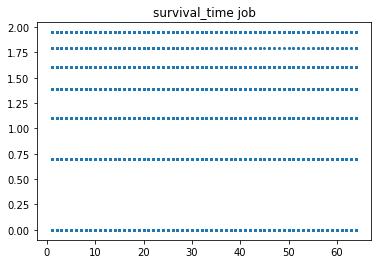

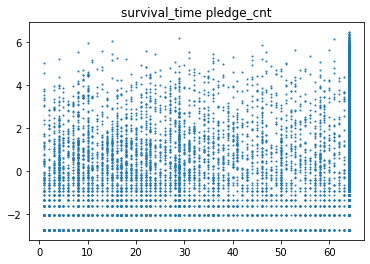

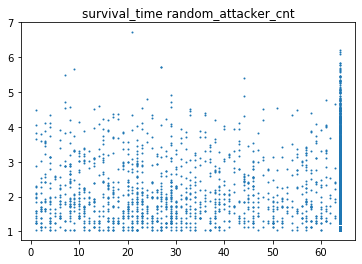

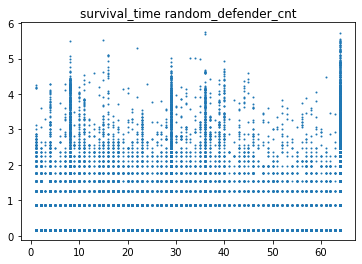

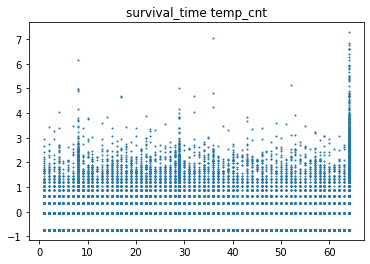

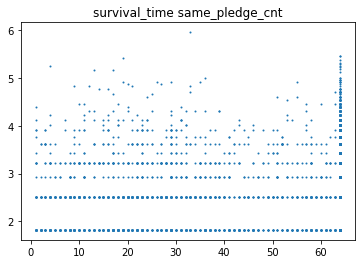

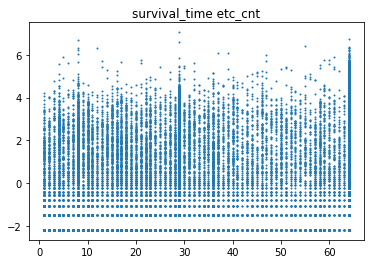

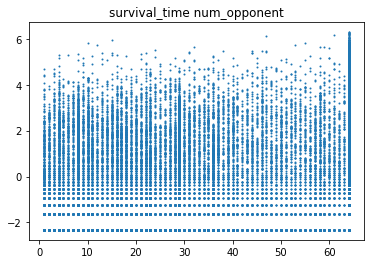

In [27]:
for col in lc_columns:
    c = label_combat[col]
    plt.scatter(label_combat.survival_time, np.log(c), s=1)
    plt.title('survival_time '+col)
    plt.show()

### 3. label_payment

In [26]:
label_payment.head()

,acc_id,survival_time,amount_spent,payment_amount_spent,count
0,105067,1,2.683944,0.454133,5
1,6037,1,0.098433,0.070408,2
2,116322,1,0.748092,0.454133,5
3,92789,1,0.748092,0.454133,5
4,55389,1,0.748092,0.454133,5


In [27]:
lp1_columns = label_payment.columns
lp1_columns

Index(['acc_id', 'survival_time', 'amount_spent', 'payment_amount_spent',
       'count'],
      dtype='object')

In [28]:
lp1_columns = lp1_columns.drop(['acc_id', 'survival_time', 'amount_spent'])

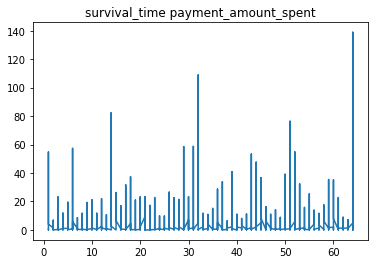

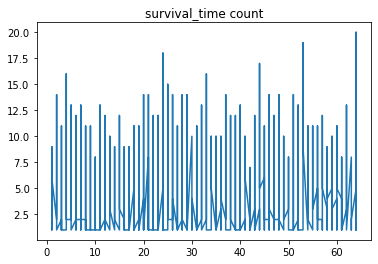

In [29]:
for col in lp1_columns:
    plt.plot(label_payment.survival_time, label_payment[col])
    plt.title('survival_time '+col)
    plt.show()

  * tr_label, tr_act = label_act
  * tr_label, tr_combat = label_combat
  * tr_label, tr_payment = label_payment
  * tr_label, tr_pledge = label_pledge
  * tr_label, tr_source_trade = label_strade
  * tr_label, tr_target_trade = label_ttrade

### 4. label_pledge

In [30]:
label_pledge.head()

,acc_id,survival_time,amount_spent,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time,count
0,105067,1,2.683944,64.311167,20.643091,0.17302,0.0,56.724352,0.0,9.492773,1.911132,39.133748,0.311585,NaN
1,116322,1,0.748092,64.311167,20.643091,0.17302,0.0,56.724352,0.0,9.492773,1.911132,39.133748,0.311585,NaN
2,92789,1,0.748092,64.311167,20.643091,0.17302,0.0,56.724352,0.0,9.492773,1.911132,39.133748,0.311585,NaN
3,55389,1,0.748092,64.311167,20.643091,0.17302,0.0,56.724352,0.0,9.492773,1.911132,39.133748,0.311585,NaN
4,99801,1,1.594617,60.882682,19.127339,0.17302,0.0,52.575534,0.0,8.701708,1.847427,38.585172,0.311585,NaN


In [31]:
lp2_columns = label_pledge.columns
lp2_columns

Index(['acc_id', 'survival_time', 'amount_spent', 'play_char_cnt',
       'combat_char_cnt', 'pledge_combat_cnt', 'random_attacker_cnt',
       'random_defender_cnt', 'same_pledge_cnt', 'temp_cnt', 'etc_cnt',
       'combat_play_time', 'non_combat_play_time', 'count'],
      dtype='object')

In [32]:
lp2_columns = lp2_columns.drop(['survival_time','amount_spent'])

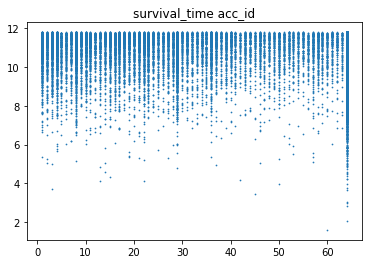

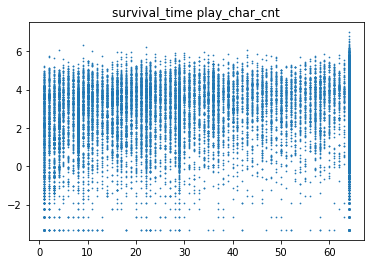

C:\Users\jangt\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


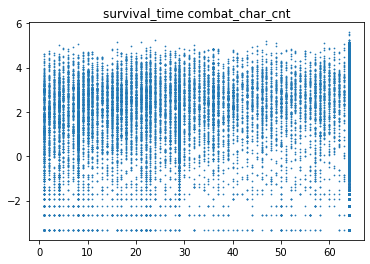

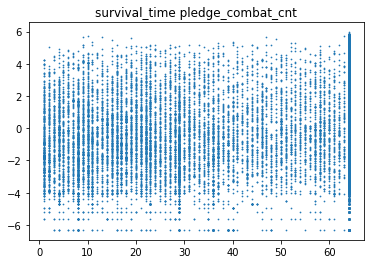

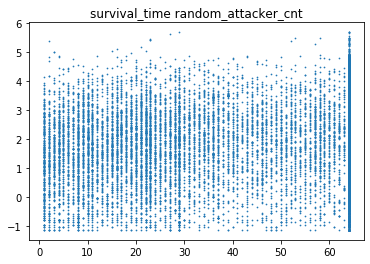

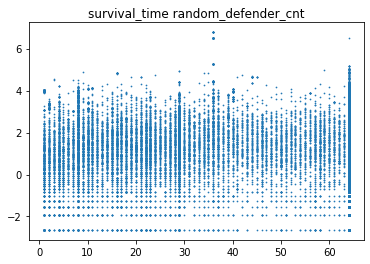

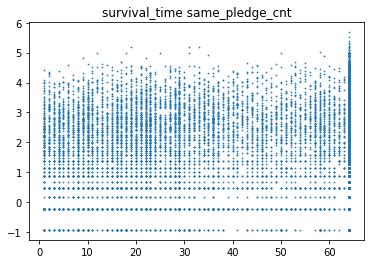

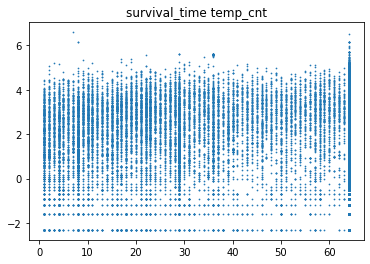

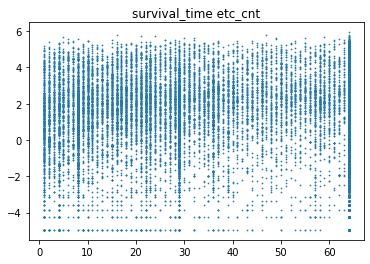

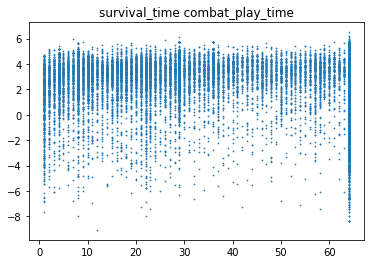

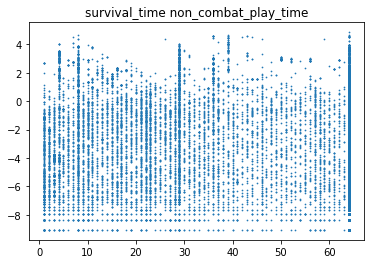

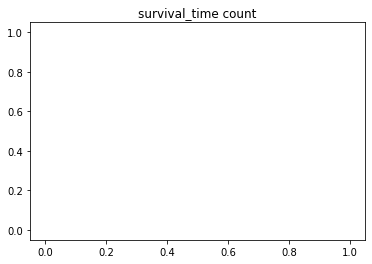

In [38]:
for col in lp2_columns:
    plt.scatter(label_pledge.survival_time, np.log(label_pledge[col]), s = 0.5)
    plt.title('survival_time '+col)
    plt.show()

### 5. label_strade

In [34]:
label_strade.head()

,acc_id,survival_time,amount_spent,item_type,count
0,115291,1,0.065622,adena,5
1,115291,1,0.065622,accessory,5
2,115291,1,0.065622,accessory,5
3,115291,1,0.065622,accessory,5
4,115291,1,0.065622,accessory,5


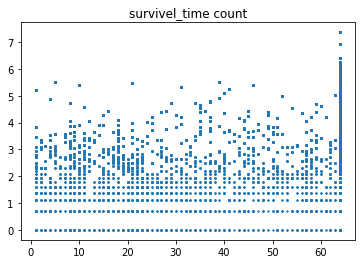

In [35]:
plt.scatter(label_strade.survival_time, np.log(label_strade['count']), s = 1)
plt.title('survivel_time count')
plt.show()

### 6. label_ttrade

In [36]:
label_ttrade.head()

,acc_id,survival_time,amount_spent,item_type,count
0,27101,1,5.407261,enchant_scroll,1
1,115291,1,0.065622,etc,5
2,115291,1,0.065622,spell,5
3,115291,1,0.065622,accessory,5
4,115291,1,0.065622,adena,5


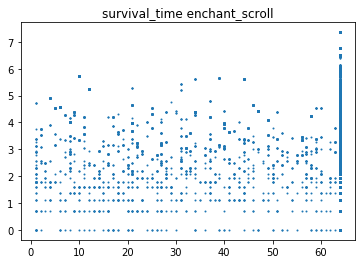

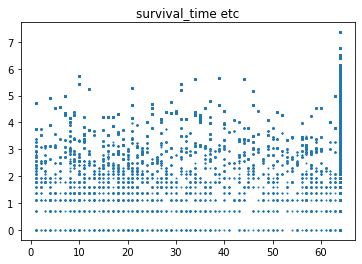

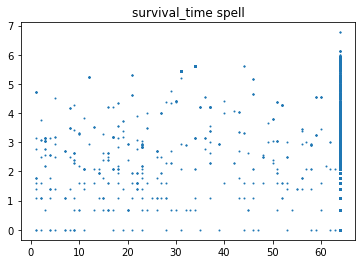

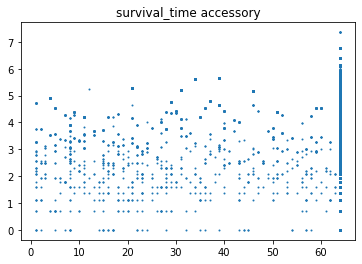

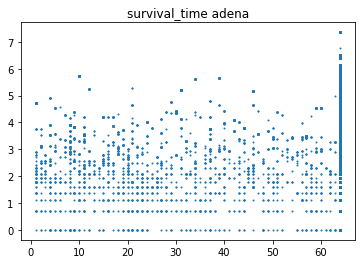

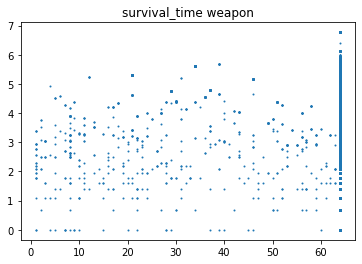

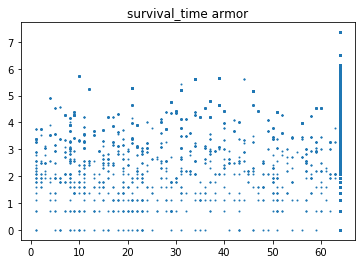

In [37]:
for item in label_ttrade.item_type.unique():
    plt.scatter(label_ttrade.loc[label_ttrade.item_type == item,'survival_time'],
                np.log(label_ttrade.loc[label_ttrade.item_type == item,'count']),
                alpha = 1,
                s = 1)
    plt.title('survival_time '+item)
    plt.show()

In [40]:
label_act = label_act.astype('int')

In [45]:
label_act.drop([label_act.loc[label_act.game_money_change == label_act.game_money_change.max(),]], axis = 0)

KeyError: 0